<a href="https://colab.research.google.com/github/fgith/data-science/blob/main/kaggle/Classification_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries for Data loading and Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [3]:
# Load each data file into a data frame
df = pd.read_csv("data.csv")

# View first 5 rows in the Dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
print('----------Dataset Shape----------')
print('No of Rows: ', df.shape[0],'| No of Columns: ',df.shape[1])
print('-----Column-wise Data types------')
print(df.isna().sum())

----------Dataset Shape----------
No of Rows:  569 | No of Columns:  32
-----Column-wise Data types------
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst          

In [7]:
# Drop column 'id'
df.drop('id', axis=1, inplace = True)

# Reset index of dataframe
df = df.reset_index(drop = True)

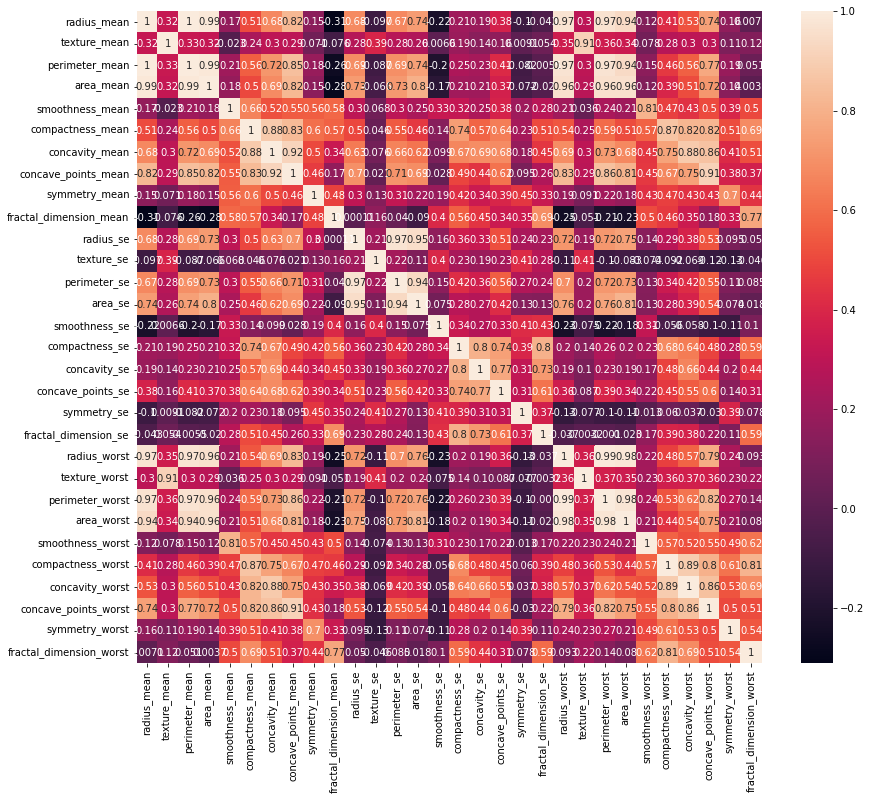

In [9]:
#  Plot Seaborn Heatmap to identify correlated features
fig = plt.figure(figsize=(14,12))         
sns.heatmap(df.corr(), annot = True)

In [16]:
# Function to select highly correlated features

def correlation(dataset, threshold):
    col_corr = set()  # Set of names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # absolute coeff value to account for -ve correlation
                colname = corr_matrix.columns[i]  # get name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(df, 0.75)
print("The following",len(set(corr_features)), "columns have high collinearity","\nColumn names:", corr_features)

The following 18 columns have high collinearity 
Column names: {'perimeter_mean', 'fractal_dimension_se', 'perimeter_se', 'perimeter_worst', 'compactness_worst', 'texture_worst', 'area_mean', 'concave_points_worst', 'concave_points_se', 'radius_worst', 'concavity_se', 'area_worst', 'area_se', 'smoothness_worst', 'concavity_worst', 'concave_points_mean', 'concavity_mean', 'fractal_dimension_worst'}


In [17]:
# Drop correlated features returned by the function from dataset
df = df.drop(corr_features,axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,symmetry_worst
0,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.4601
1,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.2750
2,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.3613
3,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.6638
4,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.2364


In [18]:
# Create X and y variables
X = df.drop(['diagnosis'],axis=1)
y = df['diagnosis'].to_frame()

In [41]:
X.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,symmetry_worst
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.4601
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.2750
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.3613
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.6638
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.2364


In [20]:
from sklearn.model_selection import train_test_split
# Split Data into Train and Test sets with 80% of data as Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=0)

In [34]:
# Import libraries for Model training, prediction and evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score

In [23]:
clf_rnd = RandomForestClassifier(n_estimators = 100, random_state=1)

# Fit Model to the training set
clf_rnd.fit(X_train,np.ravel(y_train))

# Predict testing set using the Trained Model
y_pred = clf_rnd.predict(X_test)

# Find the cross validation scores for each of the runs for K = 10 and take the mean for Accuracy
scores = cross_val_score(clf_rnd, X, np.ravel(y), scoring='accuracy', cv=5)
print("Accuracy: %0.2f" % (scores.mean()))

In [31]:
# Find the cross validation scores for each of the runs for K = 10 and take the mean for Accuracy
scores = cross_val_score(clf_rnd, X, np.ravel(y), scoring='accuracy', cv=5)
print("Accuracy: %0.2f" % (scores.mean()))

Accuracy: 0.94


In [40]:
from sklearn.preprocessing import StandardScaler

# Instantiate Stander Scaler and fit and tranform feature variable set X
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head()

# Split Data into Train and Test sets with 80% of data as Test set
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.8, random_state=0)


,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,symmetry_worst
0,1.097064,-2.073335,1.568466,3.283515,2.217515,2.255747,2.489734,-0.565265,-0.214002,1.316862,1.148757,2.750622
1,1.829821,-0.353632,-0.826962,-0.487072,0.001392,-0.868652,0.499255,-0.876244,-0.605351,-0.692926,-0.805450,-0.243890
2,1.579888,0.456187,0.942210,1.052926,0.939685,-0.398008,1.228676,-0.780083,-0.297005,0.814974,0.237036,1.152255
3,-0.768909,0.253732,3.283553,3.402909,2.867383,4.910919,0.326373,-0.110409,0.689702,2.744280,4.732680,6.046041
4,1.750297,-1.151816,0.280372,0.539340,-0.009560,-0.562450,1.270543,-0.790244,1.483067,-0.048520,-0.361092,-0.868353


In [39]:
clf_svc = SVC(probability=True)

# Fit Model to the training set
clf_svc.fit(X_train,np.ravel(y_train))

# Predict testing set using the Trained Model
y_pred = clf_svc.predict(X_test)

# Find the cross validation scores for each of the runs for K = 10 and take the mean for Accuracy
scores = cross_val_score(clf_svc, X, np.ravel(y), scoring='accuracy', cv=5)
print("Accuracy: %0.2f" % (scores.mean()))

Accuracy: 0.88


In [43]:
# Initialize Logistic Regression with max_iteration 1000
clf_log = LogisticRegression(max_iter=1000)

# Fit Model to the training set
clf_log.fit(X_train_scaled,np.ravel(y_train))

# Predict testing set using the Trained Model
y_pred = clf_log.predict(X_test_scaled)

scores = cross_val_score(clf_log, X, np.ravel(y), scoring='accuracy', cv=5)
print("Accuracy: %0.2f" % (scores.mean()))

Accuracy: 0.90
